# Clasificar con el modelo propuesto 

In [54]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image
from torchvision import transforms

In [55]:
# Define la arquitectura del modelo
def create_model(num_classes):
    return nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.AdaptiveAvgPool2d((7, 7)),
        nn.Flatten(),
        nn.Linear(128 * 7 * 7, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, num_classes)
    )

# Cargar el modelo entrenado
num_classes = 8  # Cambia este valor según el número de clases
model = create_model(num_classes)
model.load_state_dict(torch.load('modelo_entrenado_final.pth', map_location=torch.device('cpu')))
model.eval()  # Establecer el modelo en modo de evaluación


C:\Users\alex_DILE\AppData\Local\Temp\ipykernel_21464\1178449153.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('modelo_entrenado_fina

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): AdaptiveAvgPool2d(output_size=(7, 7))
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=6272, out_features=256, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=256, out_features=8, bias=True)
)

In [56]:
# Define las etiquetas y crea la estructura de carpetas
class_names = sorted([  # Asegura el orden alfabético
    'Daños por nematodos',
    'Daños por plagas',
    'Enfermedades bacterianas',
    'Enfermedades fúngicas',
    'Enfermedades virales',
    'Salud',
    'Tizón tardío (Phytophthora)',
    'Tizón temprano'
])

In [57]:
# Definir la transformación de la imagen
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar la imagen
    transforms.ToTensor(),          # Convertir la imagen a tensor
])


In [61]:
def predict_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Añadir dimensión de batch

    # Hacer la predicción
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    # Obtener la clase correspondiente
    predicted_class = class_names[predicted.item()]

    # Imprimir el nombre de la imagen y la clase predicha
    print(f"Imagen: {image_path} | Clase predicha: {predicted_class}")

    # Mostrar la imagen
    plt.imshow(image.squeeze(0).permute(1, 2, 0))  # Cambiar el orden de las dimensiones para mostrar la imagen
    plt.axis('off')  # Ocultar los ejes
    
    # Mostrar el nombre de la imagen y la clase predicha
    plt.title(f"Imagen: {image_path.split('/')[-1]}\nClase predicha: {predicted_class}")
    plt.show()


Imagen: papas_cusco_redimensionadas/imagen_107.jpg | Clase predicha: Tizón temprano


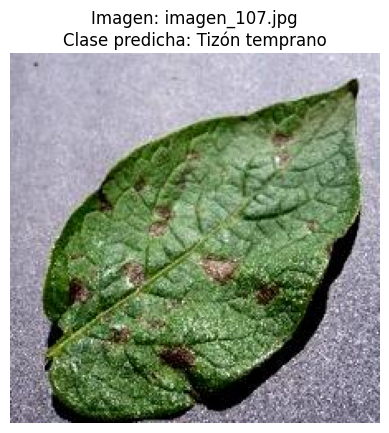

In [67]:
image_path = 'papas_cusco_redimensionadas/imagen_107.jpg'  # Cambia esta ruta por la imagen que deseas predecir
predict_image(image_path)

Imagen: papas_cusco_redimensionadas/imagen_100.jpg | Clase predicha: Tizón temprano


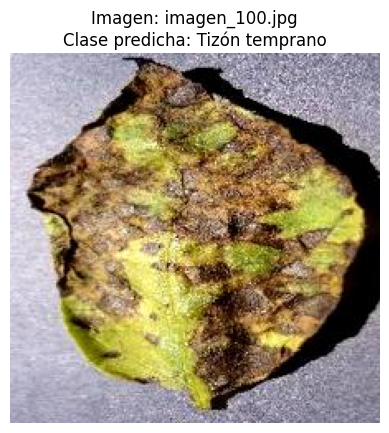

In [66]:
image_path = 'papas_cusco_redimensionadas/imagen_100.jpg'  # Cambia esta ruta por la imagen que deseas predecir
predict_image(image_path)

Imagen: papas_cusco_redimensionadas/imagen_35.jpg | Clase predicha: Tizón temprano


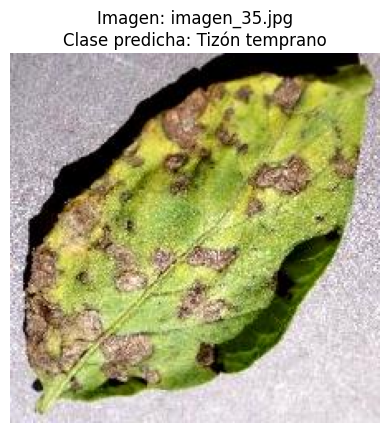

In [65]:
image_path = 'papas_cusco_redimensionadas/imagen_35.jpg'  # Cambia esta ruta por la imagen que deseas predecir
predict_image(image_path)